In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
train_df = pd.read_json('data/snli_1.0_train.jsonl', lines=True)
test_df = pd.read_json('data/snli_1.0_test.jsonl', lines=True)
dev_df = pd.read_json('data/snli_1.0_dev.jsonl', lines=True)

df = pd.concat((train_df, test_df, dev_df)).reset_index(drop=True)
df.shape

(570152, 10)

In [3]:
df

,annotator_labels,captionID,gold_label,pairID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,[neutral],3416050480.jpg#4,neutral,3416050480.jpg#4r1n,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,A person is training his horse for a competition.,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
1,[contradiction],3416050480.jpg#4,contradiction,3416050480.jpg#4r1c,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is at a diner, ordering an omelette.",( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
2,[entailment],3416050480.jpg#4,entailment,3416050480.jpg#4r1e,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is outdoors, on a horse.","( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
3,[neutral],2267923837.jpg#2,neutral,2267923837.jpg#2r1n,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,They are smiling at their parents,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...
4,[entailment],2267923837.jpg#2,entailment,2267923837.jpg#2r1e,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,There are children present,( There ( ( are children ) present ) ),(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...
...,...,...,...,...,...,...,...,...,...,...
570147,"[neutral, contradiction, entailment, contradic...",77063034.jpg#3,-,77063034.jpg#3r1n,A small girl wearing a pink jacket is riding o...,( ( ( A ( small girl ) ) ( wearing ( a ( pink ...,(ROOT (S (NP (NP (DT A) (JJ small) (NN girl)) ...,The girl is sitting on a carved horse made of ...,( ( The girl ) ( ( is ( sitting ( on ( ( a ( c...,(ROOT (S (NP (DT The) (NN girl)) (VP (VBZ is) ...
570148,"[contradiction, contradiction, contradiction, ...",77063034.jpg#3,contradiction,77063034.jpg#3r1c,A small girl wearing a pink jacket is riding o...,( ( ( A ( small girl ) ) ( wearing ( a ( pink ...,(ROOT (S (NP (NP (DT A) (JJ small) (NN girl)) ...,The girl is moving at the speed of light.,( ( The girl ) ( ( is ( moving ( at ( ( the sp...,(ROOT (S (NP (DT The) (NN girl)) (VP (VBZ is) ...
570149,"[entailment, entailment, entailment, entailmen...",4805835848.jpg#0,entailment,4805835848.jpg#0r1e,A young girl with blue and pink ribbons in her...,( ( ( A ( young girl ) ) ( with ( ( ( ( ( ( bl...,(ROOT (NP (NP (DT A) (JJ young) (NN girl)) (PP...,People in a water fountain,( People ( in ( a ( water fountain ) ) ) ),(ROOT (NP (NP (NNS People)) (PP (IN in) (NP (D...
570150,"[contradiction, contradiction, entailment, con...",4805835848.jpg#0,contradiction,4805835848.jpg#0r1c,A young girl with blue and pink ribbons in her...,( ( ( A ( young girl ) ) ( with ( ( ( ( ( ( bl...,(ROOT (NP (NP (DT A) (JJ young) (NN girl)) (PP...,A young girl knits a sweater,( ( ( A ( young girl ) ) knits ) ( a sweater ) ),(ROOT (NP (NP (DT A) (JJ young) (NN girl)) (NP...


In [134]:
df.loc[df.gold_label=='-', 'gold_label'] = 'mixed'

In [142]:
df.columns

Index(['annotator_labels', 'captionID', 'gold_label', 'pairID', 'sentence1',
       'sentence1_binary_parse', 'sentence1_parse', 'sentence2',
       'sentence2_binary_parse', 'sentence2_parse'],
      dtype='object')

In [147]:
s1, s2, labels = df.loc[145, ['sentence1_parse', 'sentence2', 'annotator_labels']]

print(s1)
print(s2)
print(f"\n{labels}")

(ROOT (S (NP (NP (DT A) (JJ small) (NN group)) (PP (IN of) (NP (NNS church-goers)))) (VP (VBP watch) (NP (DT a) (NN choir) (NN practice))) (. .)))
A choir performs in front of packed crowd.

['contradiction', 'contradiction', 'neutral', 'neutral']


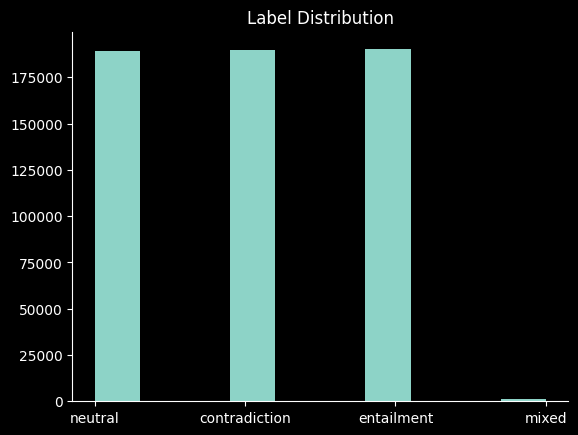

In [135]:
df.gold_label.hist()
plt.grid(False)
plt.title("Label Distribution")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("figs/label_distribution.jpg")

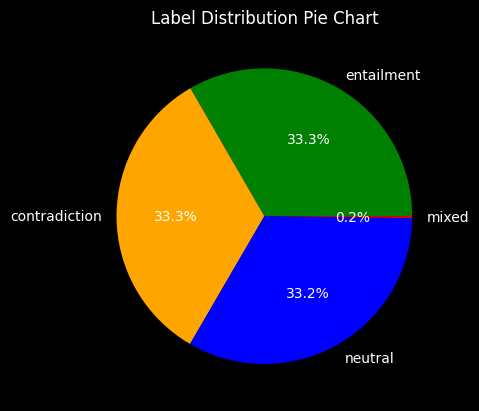

In [140]:
df.gold_label.value_counts().plot.pie(y='sentence1', legend=False, autopct='%1.1f%%',
                                          colors=['green', 'orange', 'blue', 'red'])
plt.ylabel('')
plt.title("Label Distribution Pie Chart")

plt.savefig('figs/label_distribution_pie.jpg')

In [73]:
len(train_df)

550152

In [83]:
len(test_df) + len(dev_df)

20000

In [ ]:
test_df = pd.concat((test_df, dev_df))

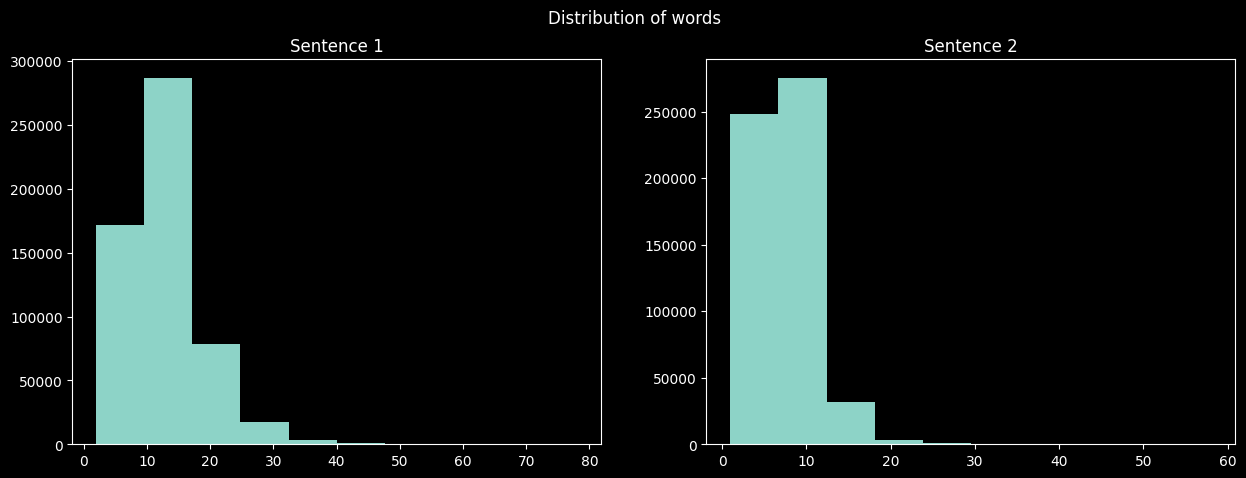

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("Distribution of words")

df.sentence1.apply(lambda s: len(s.split(" "))).hist(ax=ax1)
df.sentence2.apply(lambda s: len(s.split(" "))).hist(ax=ax2)

ax1.grid(False)
ax1.set_title("Sentence 1")
ax2.grid(False)
ax2.set_title("Sentence 2")

plt.savefig('figs/word_distribution.jpg')